<h1>Introduction</h1>

<h3>Background</h3>
    With the rising trend in science fiction and the increased knowledge in science itself, it is only a matter of time until a zombie breakout occurs.   When it comes to disaster scenarios, many people have leanings into three categories.  First group are the survivalists who prefer making a bunker to live out their days.  Second are the runners, those who hop from place to place when an area gets too crazy. Third category holds those that accept the doom and want a spectacular end.

<h3>Problem</h3>
Since the zombie apocalypse is the inevitable outcome, deciding what city to live in can be crucial to survival or preferred ending.  In order to make an informed decision for the individual, a comparison of different cities and what they have to offer is important.  There are many cities and each have different distributions of resources.  These resources need to be categorized in a meaningful way so an individual can choose which city will suit their needs at the end.

<h1>Data</h1>

<h3>Data Source</h3>
The Foursquare database will be utilized to look at different venues in the five largest cities in the United States. 

<h3>Data Selection</h3>
Several venue features will be important to categorizing each city into Survivability, Easy Escape and Spectacular cities.  For these three city types, an idea of the key venue features are listed below. 
<ol>
    <li>Survivability</li>
    <ol>
        <li>Pharmacy</li>
        <li>Gym</li>
        <li>Shopping Mall</li>
    </ol>
    <li>Easy Escape</li>
    <ol>
        <li>Gas Stations</li>
        <li>Train Stations</li>
        <li>Car Rentals</li>
    </ol>
    <li>Spectacular</li>
    <ol>
        <li>Bars</li>
        <li>Theater</li>
        <li>Bookstore</li>
    </ol>


<h1>Methodology</h1>

Import all the packagaes that will possibly be needed for the analysis of the data.

In [1]:
import numpy as np
import pandas as pd
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import json 
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

Solving environment: done

# All requested packages already installed.



Create a dataframe for each city in order to make it easier for later analysis. 

In [2]:
Nydata = [['New York', 40.6635, -73.9387]]
Ladata = [['Los Angeles', 34.0194, -118.4108]]
cdata = [['Chicago', 41.8376, -87.6818]]
hdata = [['Houston', 29.7866, -95.3909]]
pdata = [['Phoenix',33.5722, -112.0901]]
NY = pd.DataFrame(Nydata, columns=['City','Latitude', 'Longitude'])
LA = pd.DataFrame(Ladata, columns=['City','Latitude', 'Longitude'])
CG = pd.DataFrame(cdata, columns=['City','Latitude', 'Longitude'])
HU = pd.DataFrame(hdata, columns=['City','Latitude', 'Longitude'])
PX = pd.DataFrame(pdata, columns=['City','Latitude', 'Longitude'])

Foursquare credentials that will be passed in order to retrieve the venue data.

In [3]:
CLIENT_ID = 'HYTIGFNWQZAGVBXYF1SY5DTO2VPKGGUEYM0HCIL1Z3F2Y1Q2' 
CLIENT_SECRET = 'PAMCF4KBKXDTIS5V2TBQYZCQXGV0RSSWWYXEPCKMPWKAOHJM' 
VERSION = '20180605'

Define a function to get the venues for each of the cities based on a large radius and a limit of 100 venues.

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
NY_venues = getNearbyVenues(names=NY['City'], latitudes=NY['Latitude'],longitudes=NY['Longitude'])
LA_venues = getNearbyVenues(names=LA['City'], latitudes=LA['Latitude'],longitudes=LA['Longitude'])
CG_venues = getNearbyVenues(names=CG['City'], latitudes=CG['Latitude'],longitudes=CG['Longitude'])
HU_venues = getNearbyVenues(names=HU['City'], latitudes=HU['Latitude'],longitudes=HU['Longitude'])
PX_venues = getNearbyVenues(names=PX['City'], latitudes=PX['Latitude'],longitudes=PX['Longitude'])

New York
Los Angeles
Chicago
Houston
Phoenix


Define a function to break each venue out into its' own category. The function should be run on each dataframe to make a new one. 

In [10]:
def Breakdown(x):
    X_onehot = pd.get_dummies(x[['Venue Category']], prefix="", prefix_sep="")
    X_onehot['City'] = x['City'] 
    fixed_columns = [X_onehot.columns[-1]] + list(X_onehot.columns[:-1])
    X_onehot = X_onehot[fixed_columns]
    return(X_onehot)

In [12]:
NY_break=Breakdown(NY_venues)
LA_break=Breakdown(LA_venues)
CG_break=Breakdown(CG_venues)
HU_break=Breakdown(HU_venues)
PX_break=Breakdown(PX_venues)

Each city has a different distrubution of venues that fit into the three main categories.  The sum of these categories need to be determined for each city.  

In [13]:
PX_food=sum(PX_break['Wings Joint']+PX_break['Taco Place']+PX_break['Sandwich Place']+PX_break['Restaurant']+PX_break['Pizza Place']+PX_break['Mexican Restaurant']+PX_break['Latin American Restaurant']+PX_break['Japanese Restaurant']+PX_break['Indian Restaurant']+PX_break['Ice Cream Shop']+PX_break['Fried Chicken Joint']+PX_break['Fast Food Restaurant']+PX_break['Deli / Bodega']+PX_break['Coffee Shop']+PX_break['Bakery']+PX_break['Asian Restaurant']+PX_break['American Restaurant'])
PX_trans=sum(PX_break['Trail']+ PX_break['Shipping Store']+PX_break['Rental Car Location'])
PX_surv=sum(PX_break['Storage Facility']+PX_break['Pharmacy']+PX_break['Sporting Goods Shop']+PX_break['Athletics & Sports'])
PX_good=sum(PX_break['Wine Bar']+PX_break['Video Store']+PX_break['Smoke Shop']+PX_break['Bar']+PX_break['Art Gallery'])


In [14]:
HU_food=sum(HU_break['Vietnamese Restaurant']+HU_break['Vegetarian / Vegan Restaurant']+HU_break['Tex-Mex Restaurant']+HU_break['Taco Place']+HU_break['Southern / Soul Food Restaurant']+HU_break['Smoothie Shop']+HU_break['Seafood Restaurant']+HU_break['Sandwich Place']+HU_break['Salad Place']+HU_break['Restaurant']+HU_break['Pie Shop']+HU_break['Pizza Place']+HU_break['New American Restaurant']+HU_break['Mexican Restaurant']+HU_break['Italian Restaurant']+HU_break['Juice Bar']+HU_break['Hot Dog Joint']+HU_break['Greek Restaurant']+HU_break['Ice Cream Shop']+HU_break['Fried Chicken Joint']+HU_break['Fast Food Restaurant']+HU_break['French Restaurant']+HU_break['Donut Shop']+HU_break['Diner']+HU_break['Dessert Shop']+HU_break['Cajun / Creole Restaurant']+HU_break['Coffee Shop']+HU_break['Burger Joint']+HU_break['Bistro']+HU_break['BBQ Joint']+HU_break['Bagel Shop']+HU_break['American Restaurant'])
HU_tran=sum(HU_break['Trail']+HU_break['Gas Station'])
HU_surv=sum(HU_break['Gym']+HU_break['Supplement Shop']+HU_break['Hardware Store'])
HU_good=sum(HU_break['Wine Bar']+HU_break['Smoke Shop']+HU_break['Pub']+HU_break['Playground']+HU_break['Performing Arts Venue']+HU_break['Opera House']+HU_break['Brewery']+HU_break['Bookstore']+HU_break['Art Museum']+HU_break['Art Gallery'])

In [15]:
NY_food=sum(NY_break['Thai Restaurant']+NY_break['Tapas Restaurant']+NY_break['Sushi Restaurant']+NY_break['Sandwich Place']+NY_break['Southern / Soul Food Restaurant']+NY_break['Indian Restaurant']+NY_break['Caribbean Restaurant']+NY_break['Restaurant']+NY_break['Pizza Place']+NY_break['Mexican Restaurant']+NY_break['Italian Restaurant']+NY_break['Juice Bar']+NY_break['Ice Cream Shop']+NY_break['Fried Chicken Joint']+NY_break['Empanada Restaurant']+NY_break['Deli / Bodega']+NY_break['Chinese Restaurant']+NY_break['Cajun / Creole Restaurant']+NY_break['Coffee Shop']+NY_break['Bakery']+NY_break['Bistro']+NY_break['BBQ Joint']+NY_break['Bagel Shop']+NY_break['American Restaurant']+NY_break['Asian Restaurant']+NY_break['African Restaurant'])
NY_surv=sum(NY_break['Pharmacy']+NY_break['Other Great Outdoors']+NY_break['Gym'])
NY_good=sum(NY_break['Wine Shop']+NY_break['Tiki Bar']+NY_break['Smoke Shop']+NY_break['Pub']+NY_break['Music Venue']+NY_break['Museum']+NY_break['Liquor Store']+NY_break['Comic Shop']+NY_break['Cocktail Bar']+NY_break['Bookstore'])

In [17]:
CG_food=sum(CG_break['American Restaurant']+CG_break['Chinese Restaurant']+CG_break['Coffee Shop']+CG_break['Deli / Bodega']+CG_break['Dessert Shop']+CG_break['Diner']+CG_break['Donut Shop']+CG_break['Fast Food Restaurant']+CG_break['Fried Chicken Joint']+CG_break['Hot Dog Joint']+CG_break['Ice Cream Shop']+CG_break['Italian Restaurant']+CG_break['Mexican Restaurant']+CG_break['Pizza Place']+CG_break['Sandwich Place']+CG_break['Seafood Restaurant']+CG_break['Wings Joint'])
CG_trans=sum(CG_break['Gas Station']+CG_break['Train Station'])
CG_surv=sum(CG_break['Big Box Store']+CG_break['Gym']+CG_break['Miscellaneous Shop']+CG_break['Pharmacy']+CG_break['Shopping Mall']+CG_break['Supplement Shop'])
CG_good=sum(CG_break['Art Gallery']+CG_break['Bar']+CG_break['Sculpture Garden']+CG_break['Video Game Store']+CG_break['Video Store']+CG_break['Whisky Bar'])

In [18]:
LA_food=sum(LA_break['American Restaurant']+LA_break['Asian Restaurant']+LA_break['BBQ Joint']+LA_break['Bakery']+LA_break['Brazilian Restaurant']+LA_break['Burger Joint']+LA_break['Coffee Shop']+LA_break['Cuban Restaurant']+LA_break['Deli / Bodega']+LA_break['Donut Shop']+LA_break['Empanada Restaurant']+LA_break['French Restaurant']+LA_break['Frozen Yogurt Shop']+LA_break['Hawaiian Restaurant']+LA_break['Ice Cream Shop']+LA_break['Indian Restaurant']+LA_break['Indonesian Restaurant']+LA_break['Italian Restaurant']+LA_break['Japanese Restaurant']+LA_break['Mediterranean Restaurant']+LA_break['Noodle House']+LA_break['Pizza Place']+LA_break['Salad Place']+LA_break['Sandwich Place']+LA_break['Seafood Restaurant']+LA_break['Smoothie Shop']+LA_break['Sushi Restaurant']+LA_break['Taco Place']+LA_break['Thai Restaurant']+LA_break['Vegetarian / Vegan Restaurant']+LA_break['Vietnamese Restaurant'])
LA_surv=sum(LA_break['City Hall']+LA_break['Gym']+LA_break['Hotel'])
LA_good=sum(LA_break['Bookstore']+LA_break['Cocktail Bar']+LA_break['Comic Shop']+LA_break['Dive Bar']+LA_break['General Entertainment']+LA_break['Karaoke Bar']+LA_break['Massage Studio']+LA_break['Pool']+LA_break['Sports Bar']+LA_break['Theater']+LA_break['Whisky Bar']+LA_break['Wine Shop'])

Create a new dataframe to house the statistical venue data. The data will be populated by the indivicual city statistics. 

In [19]:
df2 = pd.DataFrame(columns=['City','Food', 'Transportation', 'Survival', 'Good Time'])

In [20]:
df2['City']=['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
df2['Food']=[NY_food, LA_food, CG_food, HU_food, PX_food]
df2['Transportation']=[0, 0, CG_trans, HU_tran, PX_trans]
df2['Survival']=[NY_surv, LA_surv, CG_surv,HU_surv, PX_surv ]
df2['Good Time']=[NY_good, LA_good, CG_good, HU_good, PX_good]

In [21]:
df2

,City,Food,Transportation,Survival,Good Time
0,New York,56,0,3,17
1,Los Angeles,55,0,4,12
2,Chicago,49,3,7,8
3,Houston,52,3,3,13
4,Phoenix,26,3,5,5


Make graphs to visualize the different cities and which would be best for each category. 

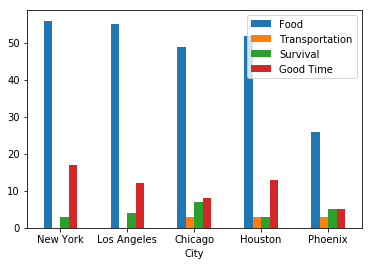

In [22]:
bar = df2.plot.bar(x='City', rot=0)

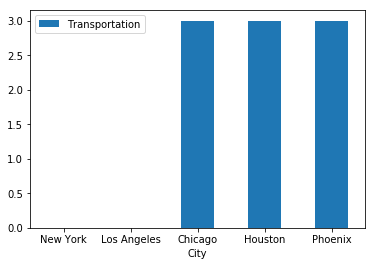

In [23]:
Trans = df2.plot.bar(x='City', y='Transportation', rot=0)

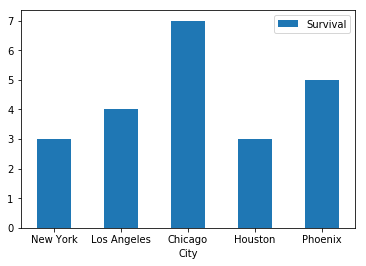

In [24]:
Surv=df2.plot.bar(x='City', y='Survival', rot=0)

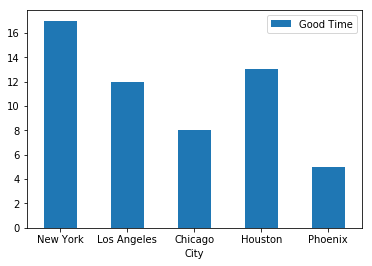

In [25]:
Good=df2.plot.bar(x='City', y='Good Time', rot=0)

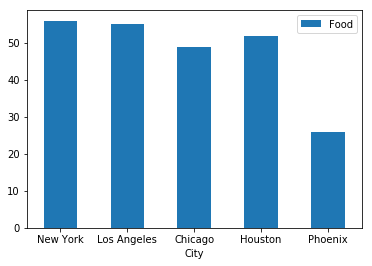

In [26]:
Food=df2.plot.bar(x='City', y='Food', rot=0)